In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [3]:
import yfinance as yf

In [6]:
tsla = yf.Ticker('TSLA')
df = tsla.history(period='max')

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 2.데이터 정보

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3653 entries, 2010-06-29 00:00:00-04:00 to 2025-01-02 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3653 non-null   float64
 1   High          3653 non-null   float64
 2   Low           3653 non-null   float64
 3   Close         3653 non-null   float64
 4   Volume        3653 non-null   int64  
 5   Dividends     3653 non-null   float64
 6   Stock Splits  3653 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 228.3 KB


In [9]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


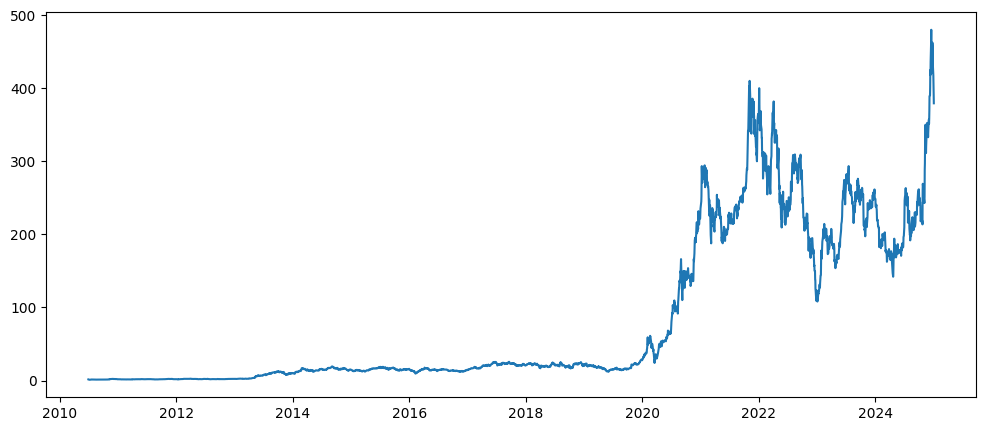

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['Close'])
plt.show()

## 3.피처 추가

In [12]:
# 3일 평균
df['ma3'] = np.around(df['Close'].rolling(window=3).mean(), 0)
# 5일 평균
df['ma5'] = np.around(df['Close'].rolling(window=5).mean(), 0)
# 20일 평균
df['ma20'] = np.around(df['Close'].rolling(window=20).mean(), 0)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma3,ma5,ma20
Date,,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,NaN,NaN,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,NaN,NaN,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,2.0,NaN,NaN
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,1.0,NaN,NaN
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,1.0,1.0,NaN


In [13]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
ma3,2
ma5,4
ma20,19


In [14]:
# 결측치 삭제
df = df.dropna()
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
ma3,0
ma5,0
ma20,0


## 4.데이터 분리

In [15]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'ma3', 'ma5', 'ma20'],
      dtype='object')

In [17]:
X = df.drop(['Close', 'Volume', 'Dividends', 'Stock Splits'], axis=1)
X.head()

,Open,High,Low,ma3,ma5,ma20
Date,,,,,,
2010-07-27 00:00:00-04:00,1.394000,1.412000,1.350667,1.0,1.0,1.0
2010-07-28 00:00:00-04:00,1.370000,1.393333,1.367333,1.0,1.0,1.0
2010-07-29 00:00:00-04:00,1.384667,1.392000,1.333333,1.0,1.0,1.0
2010-07-30 00:00:00-04:00,1.346667,1.362667,1.303333,1.0,1.0,1.0
2010-08-02 00:00:00-04:00,1.366667,1.398000,1.355333,1.0,1.0,1.0


In [18]:
y = df['Close']
y.head()

,Close
Date,
2010-07-27 00:00:00-04:00,1.370000
2010-07-28 00:00:00-04:00,1.381333
2010-07-29 00:00:00-04:00,1.356667
2010-07-30 00:00:00-04:00,1.329333
2010-08-02 00:00:00-04:00,1.394667


In [19]:
def make_sequence_dataset(X, y, window_size=20):
  feature_list = []
  label_list = []
  for i in range(len(X) - window_size):
    ux = X[i:i+window_size]
    uy = y[i+window_size]
    feature_list.append(ux)
    label_list.append(uy)
  return np.array(feature_list), np.array(label_list)

In [20]:
X_w, y_w = make_sequence_dataset(X, y)
X_w.shape, y_w.shape

<ipython-input-19-ef1db1222895>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  uy = y[i+window_size]


((3614, 20, 6), (3614,))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size=0.2, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2891, 20, 6), (723, 20, 6), (2891,), (723,))

In [ ]:
# 스케일링???

## 5.모델 만들기

In [23]:
from keras import layers

In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(20, 6)))
model.add(layers.LSTM(units=50, activation='relu'))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mse']
)

In [26]:
EPOCHS = 100
BATCH_SIZE = 16

In [27]:
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)

Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 56.6287 - mse: 56.6287 - val_loss: 8077.8638 - val_mse: 8077.8638
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.8219 - mse: 0.8219 - val_loss: 8056.6572 - val_mse: 8056.6572
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5441 - mse: 0.5441 - val_loss: 5260.6865 - val_mse: 5260.6865
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5086 - mse: 0.5086 - val_loss: 5948.5703 - val_mse: 5948.5703
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5232 - mse: 0.5232 - val_loss: 18046.7070 - val_mse: 18046.7070
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.5821 - mse: 0.5821 - val_loss: 3662.2344 - val_mse: 3662.2344
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.4157 - mse: 0.4157 - val_loss: 6612.9673 - val_mse: 6612.9673
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.4028 - mse: 0.4028 - val_loss: 5339.4829 - val_mse

### 학습 그래프

In [28]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.plot(hist['epoch'], hist['mse'], label='train_mse')
    plt.plot(hist['epoch'], hist['val_mse'], label='val_mse')
    plt.title('MSE Curve')
    plt.legend()

    plt.show()

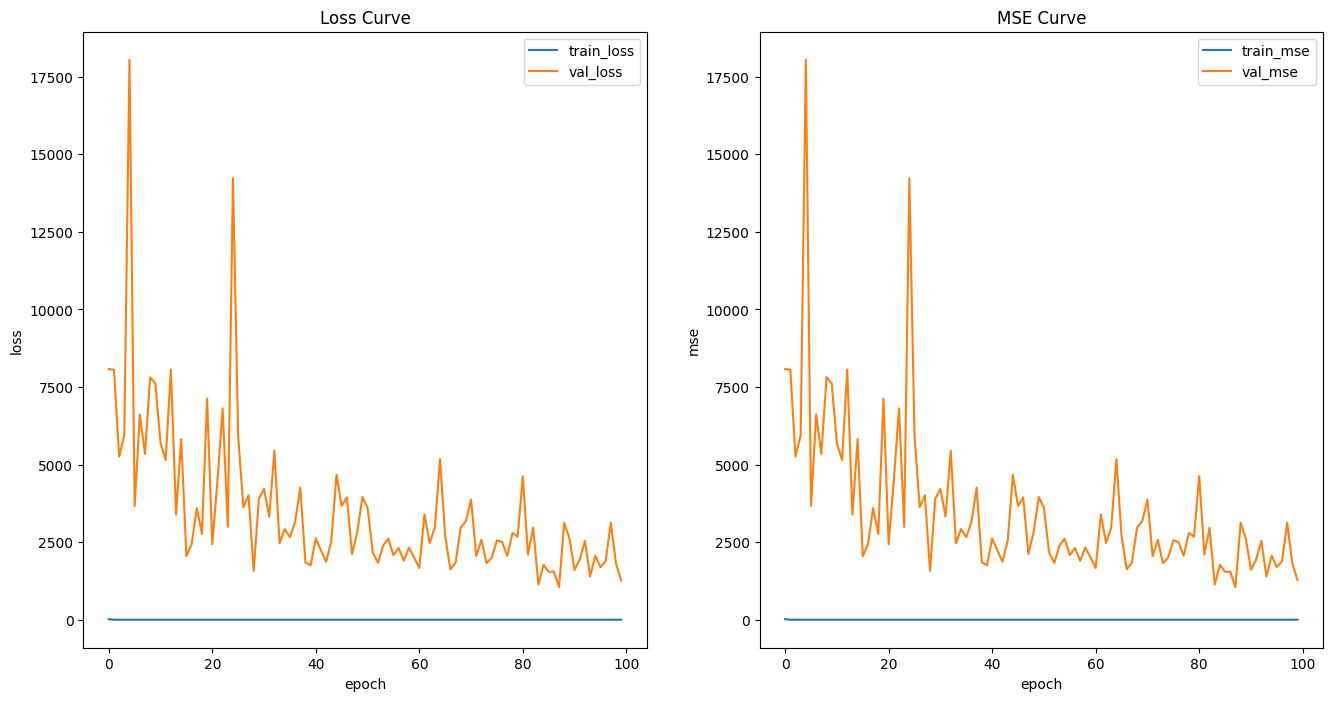

In [29]:
plot_history(history)

## 6.테스트

In [31]:
y_pred = model.predict(X_test)
y_pred[:10]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[326.4693 ],
       [277.78827],
       [323.68417],
       [313.2164 ],
       [222.69154],
       [294.34708],
       [352.83582],
       [388.63766],
       [275.62323],
       [268.3379 ]], dtype=float32)

In [32]:
y_test[:10]

array([307.79666138, 292.1166687 , 285.66000366, 273.84332275,
       254.67999268, 266.92333984, 269.95666504, 290.14334106,
       288.12332153, 293.29666138])

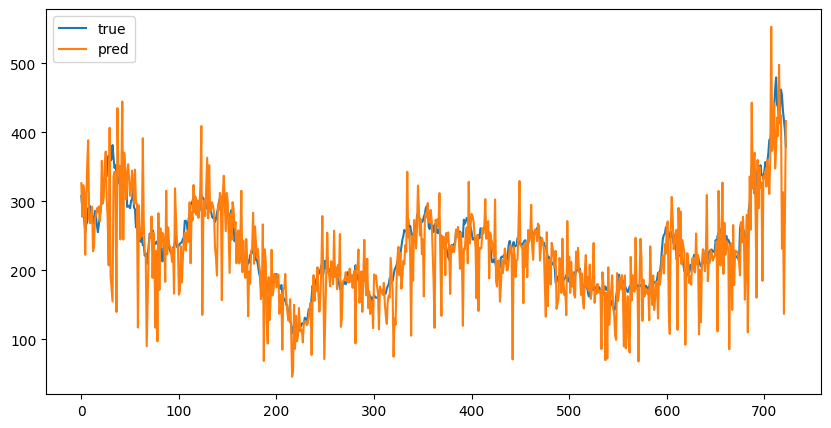

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()